# <h3 align="center"> **Atividade Prática**</h3> 




<h3 align="center"> Data: 02/07/2010</h3> 

Vamos iniciar estudando o comportamento de SVM Linear
- No SktLearn, trata-se do classificador **LinearSVC** ou **svm.SVC(kernel='linear')**, embora essas duas versões possam gerar soluções ligeiramente differentes.


In [1]:
# Importando bibliotecas necessárias
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

Abaixo há uma função criada para plotar o hiperplano de separação ótima, os vetores de suporte e a margem. O código está oculto para não poluir o notebook. Não esqueça de executar essa função.

In [2]:
#@title Função para plotar hiperplano de separação ótima, vetores de suporte e margem (hiperplano_otimo_plot)
# Função criada para plotar hiperplano de separação ótima, vetores de suporte e margem
def hiperplano_otimo_plot(X, y, modelo, ax=None):
    if ax is None:
        ax = plt.gca()
    #ax.plot(x, y) ## example plot here
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Classe 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Classe 1")
    plt.legend(loc="upper center", fontsize=14) 
    # plotando a função de decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # criando um grid para avaliar o modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = modelo.decision_function(xy).reshape(XX.shape)

    # plotando a superfície de decisão e as margens
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

    # plotando vetores de suporte
    ax.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
    return(ax)

Nós vamos criar uma base artificial (base sintética) para conseguirmos visualizar melhor o resultado das modificações nos parâmetros de SVM. É uma base composta por dois atributos e 11 instâncias.

In [3]:
#Criando a base de dados X2D e rótulos correspondentes y.
X1D = np.linspace(-12, 12, 11).reshape(-1, 1)
X = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

#Obtendo número de instâncias e de atributos da base
X.shape

(11, 2)

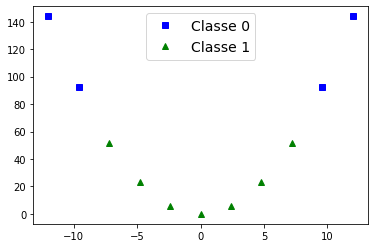

In [4]:
#A base representada no espaço de atributos mostra que esse é um problema linearmente separável
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Classe 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Classe 1")
plt.legend(loc="upper center", fontsize=14)

plt.show()

Agora nós vamos treinar SVM linear para resolver esse problema de classificação

In [5]:
from sklearn import svm

#Vamos criar um classificador SVM linear com parâmetro de regularização C = 10
modelo = svm.SVC(kernel='linear', C=10) # Kernel Linear com parâmetro de regularização C = 10

#Vamos treinar um modelo usando a base X
modelo.fit(X, y)

SVC(C=10, kernel='linear')

Aqui nós veremos o hiperplano de separação ótima, os vetores de suporte e a margem

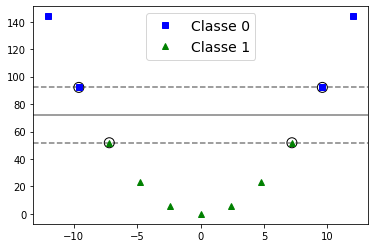

In [6]:
hiperplano_otimo_plot(X, y, modelo)
plt.show()

In [7]:
#Uma vez treinado o modelo, nós vamos criar uma instância separada para ser testada pelo modelo treinado
novoX =  np.array([-3.5, 85.25]).reshape(1, -1)

#Vamos verificar para qual das duas classes a nova instância será atribuída
print("Classe predita", modelo.predict(novoX))

Classe predita [0]


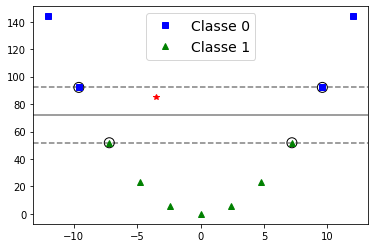

In [9]:
#Vamos verificar onde a nova instância está localizada no espaço de atributos. A nova instância está marcada como um * vermelho

hiperplano_otimo_plot(X, y, modelo)

plt.plot(novoX[:, 0], novoX[:, 1], "r*")

plt.show()

É possível verificar que, visualmente, a classificação está correta.

##**Entendendo o efeito de *outliers* e da regularização:** nós vamos adicionar essa nova instância à base de treinamento e verificar o efeito no hiperplano de separação ótima

In [10]:
#nX será a nova base de treinamento e ny será a nova lista de rótulos

nX = np.append(X,  novoX, axis = 0)
ny = np.append(y, np.array([1]), axis =0)


Nas células seguintes, **você deve fazer o seguinte**:


1.   Treinar SVM com a nova base nX e os mesmos parâmetros utilizados para treinar X, isto é, SVM com kernel linear e com C = 10
2.   Plotar o hiperplano resultante, junto com vetores de suporte e a margem



In [49]:
# Treinando SVM com a nova base

#Vamos criar um classificador SVM linear com parâmetro de regularização C = 10
modeloNovo = svm.SVC(kernel='linear', C=0.01) # Kernel Linear com parâmetro de regularização C = 10

modeloNovo.fit(nX, ny)
modeloNovo.fit(nX, ny).score(nX, ny)
#predizendo para [1]
#print("Classe predita", modeloNovo.predict(novoX))

0.9166666666666666

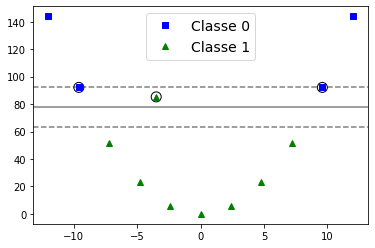

In [50]:
#Plotando o hiperplano de separação, os vetores de suporte e a margem

hiperplano_otimo_plot(nX, ny, modeloNovo)

#plt.plot(novoX[:, 0], novoX[:, 1], "r*")

plt.show()


**Responda**: 


**1.**  Qual a diferença do hiperplano e da margem obtidos utilizando a nova base em comparação com esses itens obtidos ao treinar SVM com a base anterior?

R: A distância entre os vetores de suporte e a margem é menor.

**2.**   O que ocasionou essas mudanças?

R: Redução da distância, em relação à margem, dos pontos mais próximos à ela. Então, para maximizar a distância desses pontos, foi reduzida a distância em relação ao conjunto de pontos anterior.


Nós vimos que o parâmetro de regularização C ajuda SVM a estabelecer um melhor compromisso entre viés e variância e reduzir o impacto do *overfitting*, pois passa a permitir que SVM aceite erros de treinamento.


**3.**   Nesse caso, o valor de C deve aumentar ou diminuir?

R: O valor de C deve diminuir para evitar o overfitting. Para isso, é escolhida uma margem mais suave invés de uma mais resistente, de forma que alguns pontos entrem intencionalmente na margem (ainda penalizando eles) para que o classificador não dê overfit na amostra de treino.

**4.**   Tente modificar o valor de C para gerar um hiperplano com mais capacidade de generalização. Mostre a figura do resultado obtido.
* Você pode modificar o valor de C usando intervalos relativamente longos, por exemplo: C = 0.1; C = 1; C = 10 e C = 100. Se for necessário, teste intervalos menores.



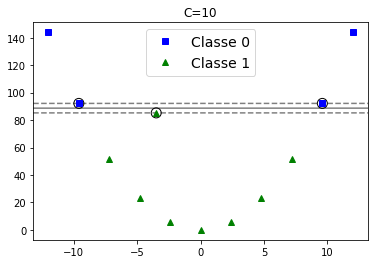

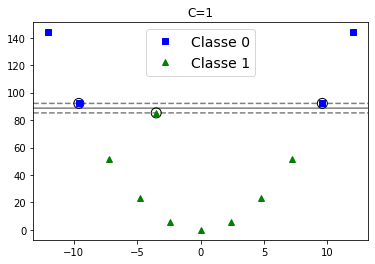

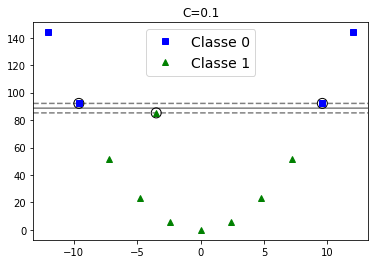

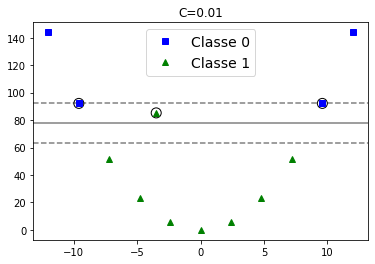

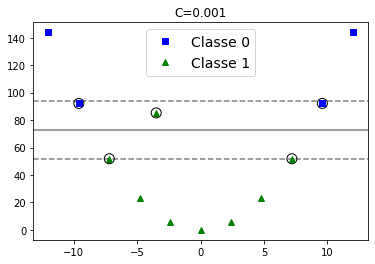

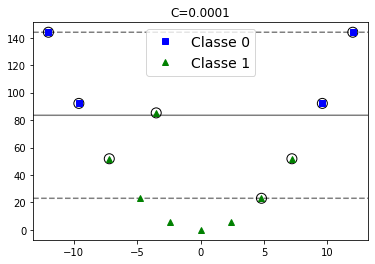

In [51]:
# Variando o valor de C

modelo1 = svm.SVC(kernel='linear', C=10)
modelo1.fit(nX, ny)
hiperplano_otimo_plot(nX, ny, modelo1)
plt.title('C=10')

plt.show()

modelo1 = svm.SVC(kernel='linear', C=1)
modelo1.fit(nX, ny)
hiperplano_otimo_plot(nX, ny, modelo1)
plt.title('C=1')

plt.show()


modelo1 = svm.SVC(kernel='linear', C=0.1)
modelo1.fit(nX, ny)
hiperplano_otimo_plot(nX, ny, modelo1)
plt.title('C=0.1')

plt.show()

modelo = svm.SVC(kernel='linear', C=0.01)
modelo.fit(nX, ny)
hiperplano_otimo_plot(nX, ny, modelo)
plt.title('C=0.01')

plt.show()

modelo = svm.SVC(kernel='linear', C=0.001)
modelo.fit(nX, ny)
hiperplano_otimo_plot(nX, ny, modelo)
plt.title('C=0.001')

plt.show()

modelo = svm.SVC(kernel='linear', C=0.0001)
modelo.fit(nX, ny)
hiperplano_otimo_plot(nX, ny, modelo)
plt.title('C=0.0001')

plt.show()

In [52]:
# Melhor hiperplano de separaçao obtido

# Trabalhando com problemas mais reias e com diferentes tipos de kernel

Nesse exemplo, nós utilizaremos a base **Breast Cancer** disponível no sklearn, mas originário do repositório da UCI (https://archive.ics.uci.edu/ml/datasets/breast+cancer). Trata-se de uma base de dados que foi obtida a partir de imagens digitalizadas de massas mamárias e que descrevem **dois** tipos de classe: maligno (harmful) e benigno (not harmful). Os atributos descrevem características dos núcleos celulares presentes nas imagens.

No total, são **30 atributos** ordenados: raio médio, textura média, perímetro médio, área média, suavidade média, compacidade média, concavidade média, pontos côncavos médios, simetria média, dimensão fractal média, erro de raio, erro de textura, erro de perímetro, erro de área, erro de suavidade, erro de compactação, erro de concavidade, erro de pontos côncavos, erro de simetria, erro de dimensão fractal, pior raio, pior textura, pior perímetro, pior área, pior suavidade, pior compacidade, pior concavidade, piores pontos côncavos, pior simetria e pior dimensão fractal) e um alvo (tipo de câncer).

Nós vamos utilizar o Pandas para facilitar a visualização dos dados estruturados

In [14]:
#Importando as bibliotecas
import pandas as pd
from sklearn import datasets

#Carregando a base de dados
cancer = datasets.load_breast_cancer()

In [15]:
#Vamos visualizar os dados

cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
#Convertendo o dataset do Sklearn para o Dataframe do Pandas. Para isso,  nós vamos concatenar target e data usang o numpy 

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

#Para visualizar os dados na forma de tabela
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
#Vamos dividir a base em duas partições: treino e teste. A base de treino terá 80% das instâncias, enquanto a de teste terá 20%

from sklearn.model_selection import train_test_split

#Vamos definir X para receber as instâncias, enquanto y terá os rótulos

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

#Dividindo a base (com seleção aleatória)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [19]:
#Como os atributos originais estão em diferentes escalas, nós vamos normalizar os dados aqui

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)


# Trabalhando com problemas reais e com diferentes tipos de kernel#

Nesse exemplo, nós utilizaremos a base **Breast Cancer** disponível no sklearn, mas originária do repositório da UCI (https://archive.ics.uci.edu/ml/datasets/breast+cancer). Trata-se de uma base de dados que foi obtida a partir de imagens digitalizadas de massas mamárias e que descreve **dois** tipos de classe: maligno (harmful) e benigno (not harmful). Os atributos descrevem características dos núcleos celulares presentes nas imagens.

No total, são **30 atributos** ordenados: raio médio, textura média, perímetro médio, área média, suavidade média, compacidade média, concavidade média, pontos côncavos médios, simetria média, dimensão fractal média, erro de raio, erro de textura, erro de perímetro, erro de área, erro de suavidade, erro de compactação, erro de concavidade, erro de pontos côncavos, erro de simetria, erro de dimensão fractal, pior raio, pior textura, pior perímetro, pior área, pior suavidade, pior compacidade, pior concavidade, piores pontos côncavos, pior simetria e pior dimensão fractal.

Nós vamos utilizar o Pandas para facilitar a visualização dos dados estruturados

In [20]:
#Importando as bibliotecas
import pandas as pd
from sklearn import datasets

#Carregando a base de dados
cancer = datasets.load_breast_cancer()

In [21]:
#Verificando quantidade de instâncias e de atributos
# Vamos também acessar os dados

print(cancer.data.shape)
cancer.data

(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [22]:
# E  as classes
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [23]:
#Convertendo o dataset do Sklearn para o Dataframe do Pandas. Para isso,  nós vamos concatenar target e data usando o numpy 

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

#Para visualizar os dados na forma de tabela
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [24]:
#Vamos dividir a base em duas partições: treino e teste. A base de treino terá 80% das instâncias, enquanto a de teste terá 20%

from sklearn.model_selection import train_test_split

#Vamos definir X para receber as instâncias, enquanto y terá os rótulos
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

#Dividindo a base (com seleção de instâncias aleatória)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [25]:
#Como os atributos originais estão em diferentes escalas, nós vamos normalizar os dados aqui, pois é importante deixar os atributos todos nos mesmos intervalos de dados

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)


Agora nós vamos criar dois modelos de SVM. Será um modelo não linear com kernel polinomial e um modelo não linear com kernel RBF. Vamos iniciar com o **kernel polinomial**.


In [26]:
# Definição do algoritmo e passagem de parâmetros. O kernel polinomial, além do grau, tem como parâmetro gamma. Neste caso, nós deixaremos gamma como o valor default.

modelo_polinomial = svm.SVC(kernel='poly', degree=3
                            , gamma='auto', C=10) # Kernel Polinomial com parâmetro de regularização C = 10

#Vamos treinar o modelo usando a base X_Train

modelo_polinomial.fit(X_train, y_train)


SVC(C=10, gamma='auto', kernel='poly')

In [27]:
#Vamos fazer as predições para a base e teste

y_pred_poli = modelo_polinomial.predict(X_test)

Avaliação de modelos

In [28]:
#Importando o módulo de cálculo de métricas de avaliação do scikit-learn 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Avaliação do modelo
print(confusion_matrix(y_test,y_pred_poli))
print(classification_report(y_test,y_pred_poli))  
print("Acurácia Polinomial:", accuracy_score(y_test, y_pred_poli))

[[38  5]
 [ 0 71]]
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        43
         1.0       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Acurácia Polinomial: 0.956140350877193


**Atividade**

1. Tente ajustar o parâmetro relacionado ao grau do polinômio do kernel polinomial e responda: É possível melhorar o resultado? Obs: O grau do polinômio é um valor discreto, portanto, você pode utilizar valores como 2, 3, 4, etc. O valor de C já está superficialmente otimizado. Portanto, você não precisa modificar o valor de C.

R:

Valores de acurácia:

Grau = 2 -> 0.8245614035087719

Grau = 3 -> 0.956140350877193

Grau = 4 -> 0.7807017543859649

Grau = 5 -> 0.8245614035087719

Sim, é possível melhorar o resultado. Utilizando o grau 3 percebe-se uma acurácia maior e consequentemente um erro menor.



2. Utilize o kernel rfb e faça ajustes no parâmetro gamma. Qual tipo de kernel apresentou melhor resultado? Obs: o valor de gamma é contínuo. Novamente, você não precisa modificar o valor de C.

R: 

O kernel do tipo 'rbf' apresentou melhor acurácia para gamma igual a 0.1.

3. Compare os resultados obtidos por SVM aos resultados obtidos por kNN, Naive Bayes e Árvores de Decisão. Qual dos algoritmos de Aprendizagem de Máquina testados apresentou melhor resultado?

kNN e Naive Bayes, com acurácia de 0.9649122807017544


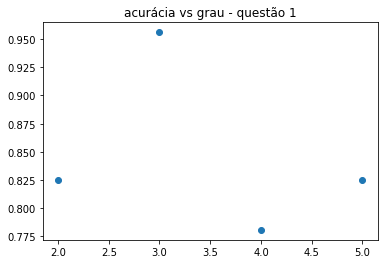

In [54]:
listGrau = [0.8245614035087719, 0.956140350877193, 0.7807017543859649, 0.8245614035087719]
listNumbersGrau = [2,3,4,5]

plt.scatter(listNumbersGrau, listGrau)
plt.title('acurácia vs grau - questão 1')
plt.show()

In [55]:
#Gerando o modelo com kernel RBF

modelo_rbf = svm.SVC(kernel='rbf', degree=0.7, gamma=0.1, C=10) # Kernel RBF com parâmetro de regularização C = 10

modelo_rbf.fit(X_train, y_train)

y_pred_poli = modelo_rbf.predict(X_test)


#métricas de acurácia para o kernel rbf do support vector machines

print(confusion_matrix(y_test, y_pred_poli))
print(classification_report(y_test, y_pred_poli))  
print("Acurácia Radial Basis Function:", accuracy_score(y_test, y_pred_poli))



[[41  2]
 [ 2 69]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Acurácia Radial Basis Function: 0.9649122807017544


maior acurácia para knn: 0.9649122807017544
[8, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85]


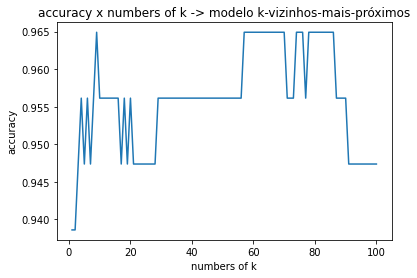

In [65]:
### aplicação de modelos

#k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

#training the data using K-Nearest Neighbor

accuracies = []

for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))


import matplotlib.pyplot as plt

#plotting the accuracy for the already set parameters

k_list = range(1,101)

max = accuracies[0]
kBiggestAccuracy = []

for x in range(len(accuracies)):
    if (max < accuracies[x]):
        max = accuracies[x]

print('maior acurácia para knn:', max)

for x in range(len(accuracies)):
    if (accuracies[x] == max):
        kBiggestAccuracy.append(x)


print(kBiggestAccuracy)

plt.plot(k_list, accuracies)

plt.xlabel('numbers of k')
plt.ylabel('accuracy')
plt.title('accuracy x numbers of k -> modelo k-vizinhos-mais-próximos')

plt.show()

In [69]:
## Naive Bayes

# Gaussian
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

yPredictionNB = gnb.fit(X_train, y_train).predict(X_test)

print("Acurácia Gaussian Naive Bayes:", accuracy_score(y_test, yPredictionNB))

Acurácia Gaussian Naive Bayes: 0.9649122807017544


In [72]:
#árvores de decisão

from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()

yPredictedDT = decisionTree.fit(X_train, y_train).predict(X_test)

print("Acurácia da árvore de decisão é:", accuracy_score(y_test, yPredictedDT))

Acurácia da árvore de decisão é: 0.9385964912280702
